### Objective:  

To implement a model to predict if their client will subscribe (yes/no) a term deposit(variable "Target") based on the analysis of data from marketing campaigns ran by a Portuguese banking institution.

In [1]:
# Importing necessary libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from scipy.stats import zscore

In [2]:
# Reading the dataset
df = pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### EXPLORATORY DATA ANALYSIS

In [3]:
# Shape of the data
print("Shape of Dataframe is :",df.shape)

Shape of Dataframe is : (45211, 17)


In [4]:
# Data type of each attribute
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
# Check the presence of missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

There are no missing values.

In [6]:
# 5 point summary of numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


### Distribution of Independent variables

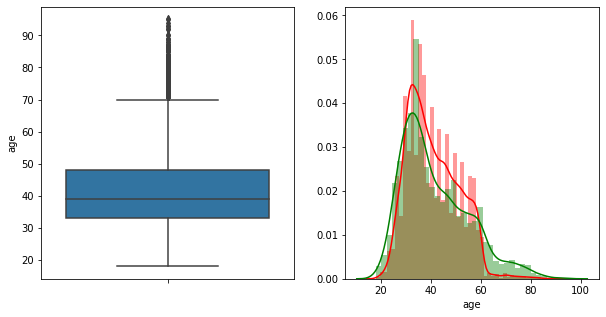

In [7]:
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x='age',data=df,orient='v')
plt.subplot(1,2,2)
sns.distplot( df[df.Target == 'no']['age'], color = 'r')
sns.distplot( df[df.Target == 'yes']['age'], color = 'g')

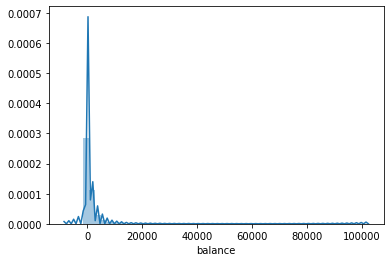

In [8]:
sns.distplot(df.balance)

In [9]:
df.loc[df.balance < 0,'balance'] = "negative"
df.balance.replace("negative",0,inplace=True)
df.loc[(df.balance >0) & (df.balance <=30000),'balance'] = "less"
df.balance.replace("less",1,inplace=True)
df.loc[(df.balance > 30000) & (df.balance <=40000),'balance'] = "middle"
df.balance.replace("middle",2,inplace=True)
df.loc[df.balance > 40000,'balance'] = "high"
df.balance.replace("high",3,inplace=True)

In [10]:
#putting age into bins
df.loc[df["age"] < 30,  'age'] = 20
df.loc[(df["age"] >= 30) & (df["age"] <= 39), 'age'] = 30
df.loc[(df["age"] >= 40) & (df["age"] <= 49), 'age'] = 40
df.loc[(df["age"] >= 50) & (df["age"] <= 59), 'age'] = 50
df.loc[df["age"] >= 60, 'age'] = 60

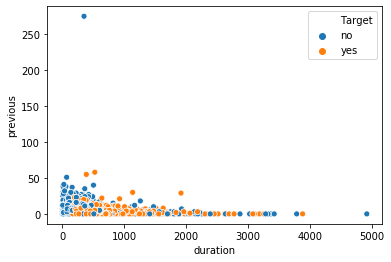

In [11]:
sns.scatterplot(x=df.duration,y=df.previous,hue=df.Target)

In [12]:
df[df.previous == 275].index.tolist()

[29182]

In [13]:
# Replacing the outlier at index 29182 with median of "previous" column
df.loc[df.previous==275,'previous'] = df.previous.median()

"Duration” has positive effect on people saying “yes”. Longer the conversations on the phone, higher the interest to open a Term deposit. 

#### Distribution of Categorical variables

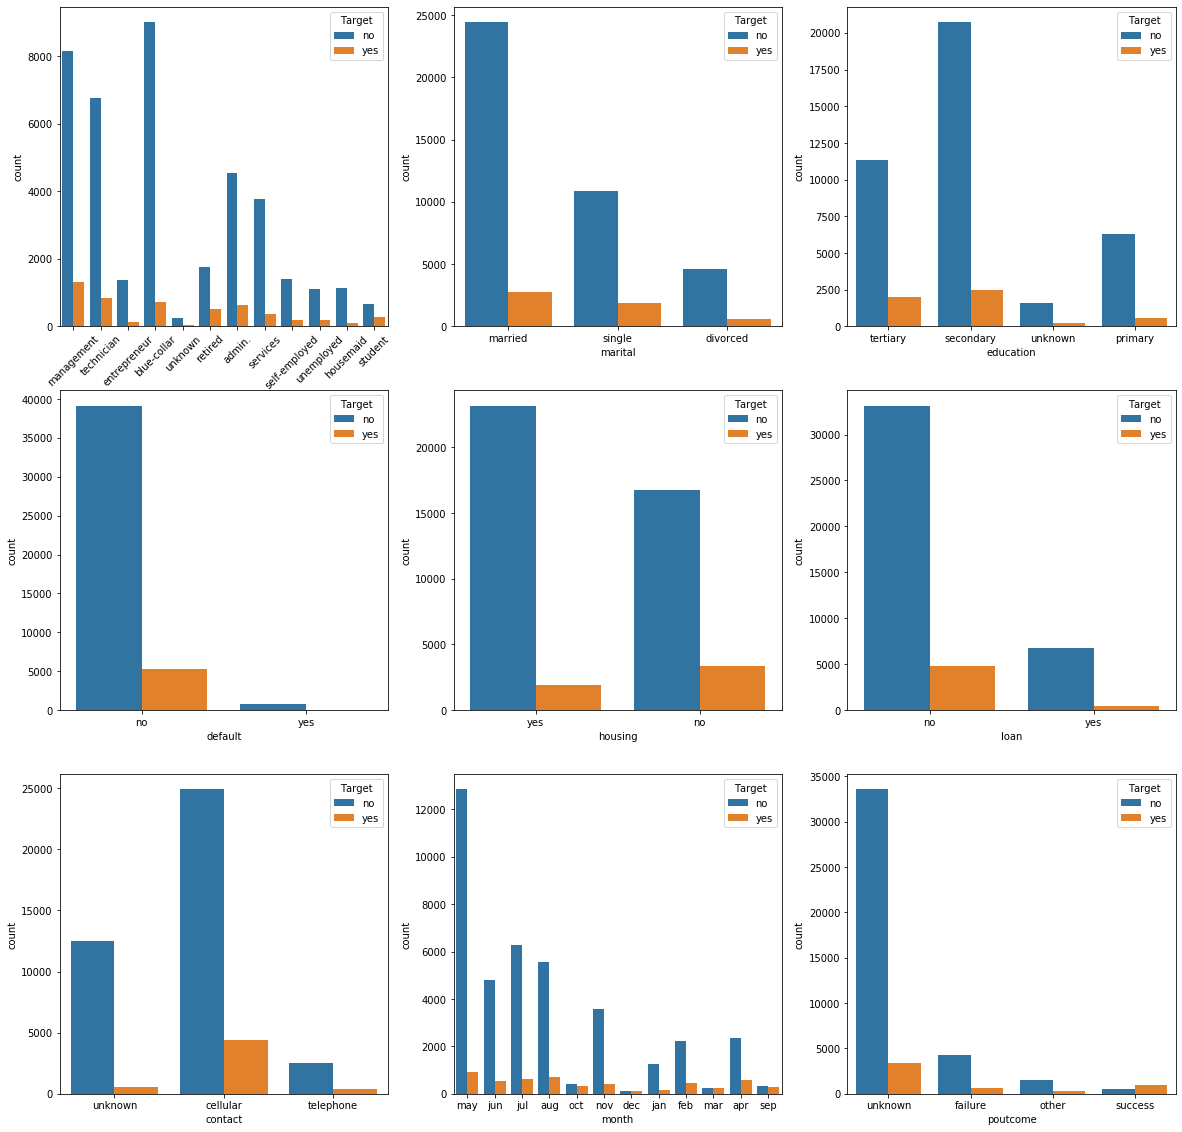

In [14]:
fig = plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.xticks(rotation=45)
sns.countplot(x = df.job, data = df, hue = 'Target')
plt.subplot(3,3,2)
sns.countplot(x = df.marital, data = df, hue = 'Target')
plt.subplot(3,3,3)
sns.countplot(x = df.education, data = df, hue = 'Target')
plt.subplot(3,3,4)
sns.countplot(x = df.default, data = df, hue = 'Target')
plt.subplot(3,3,5)
sns.countplot(x = df.housing, data = df, hue = 'Target')
plt.subplot(3,3,6)
sns.countplot(x = df.loan, data = df, hue = 'Target')
plt.subplot(3,3,7)
sns.countplot(x = df.contact, data = df, hue = 'Target')
plt.subplot(3,3,8)
sns.countplot(x = df.month, data = df, hue = 'Target')
plt.subplot(3,3,9)
sns.countplot(x = df.poutcome, data = df, hue = 'Target')

#### Observations:
- Management job clients have higher subscription. 
- Married clients have more interest to subscribe term deposit.
- Month of highest level of marketing activity is May and is having the lowest subscription.

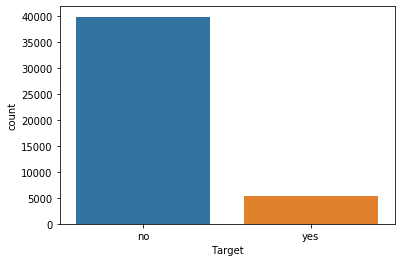

In [15]:
sns.countplot(x = df.Target, data = df)

Customers who are likely to subscribe term deposit are <strong>very low</strong> compared to customers not subscribed

In [16]:
# Converting Categorical variables to Continuous
df.job.replace(['blue-collar','management','technician','admin.','services','retired','self-employed','entrepreneur','unemployed','housemaid','student','unknown'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df.marital.replace(['married','single','divorced'],[1,2,3],inplace=True)
df.education.replace(['secondary','tertiary','primary','unknown'],[1,2,3,4],inplace=True)
df.default.replace(['no','yes'],[1,2],inplace=True)
df.housing.replace(['no','yes'],[1,2],inplace=True)
df.loan.replace(['no','yes'],[1,2],inplace=True)

In [17]:
df.poutcome.replace(['failure','other','success','unknown'],[1,2,3,4],inplace=True)
df.contact.replace(['cellular','telephone','unknown'],[1,2,3],inplace=True)
df.month.replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[1,2,3,4,5,6,7,8,9,10,11,12],inplace=True)
df.Target.replace(['no','yes'],[0,1],inplace=True)

In [18]:
df.pdays = df.pdays.abs()

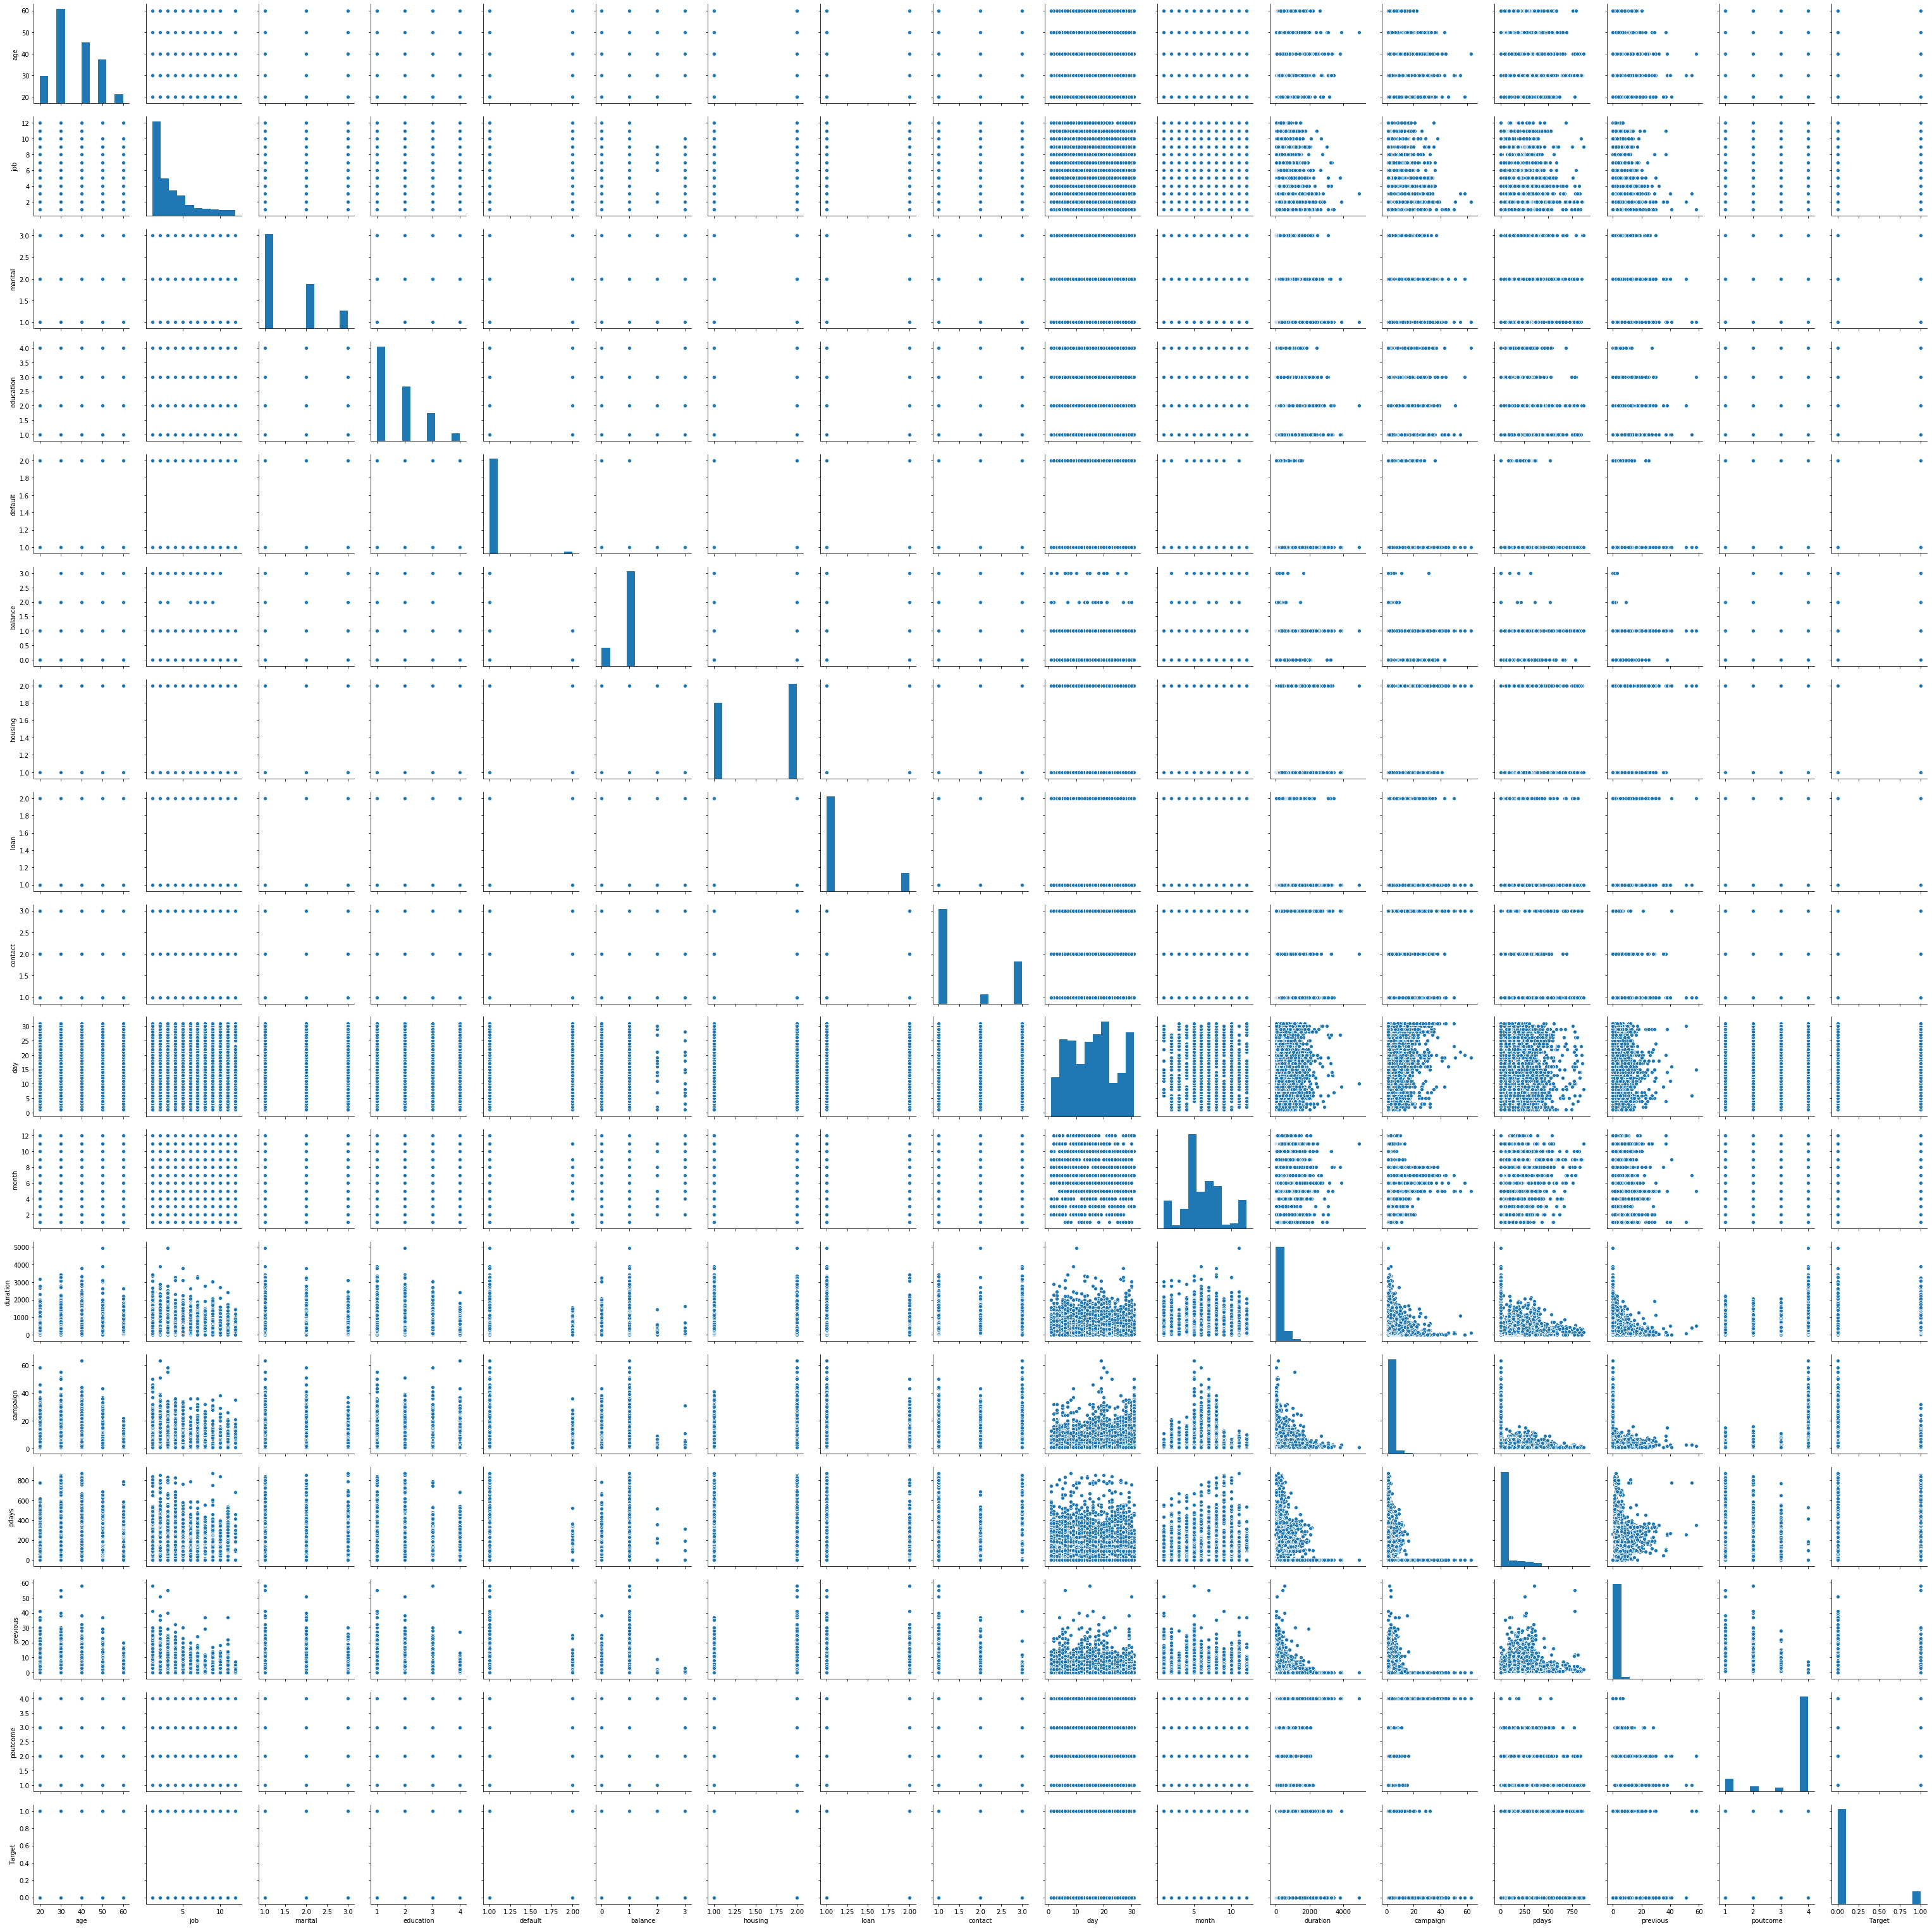

In [19]:
sns.pairplot(df)

#### Correlation: Heatmap

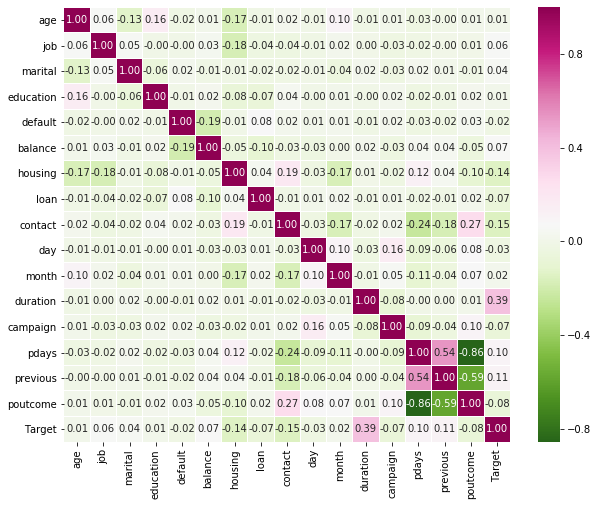

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),fmt='.2f',annot=True,linewidths=0.01,cmap='PiYG_r')

Correlation between pdays and poutcome is high. We can drop either pdays or poutcome.

### Splitting Data into training and test set in the ratio 70:30

In [21]:
Xi = df.drop('Target',axis=1)
X = Xi.apply(zscore)
y = df.Target

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Logistic Regression

In [23]:
lr_model = LogisticRegression(solver='lbfgs',max_iter=100)
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr_model.score(X_test,y_test)

0.8909613683279268

In [25]:
lr_pred = lr_model.predict(X_test)

Accuracy :  0.8909613683279268
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.56      0.21      0.31      1551

    accuracy                           0.89     13564
   macro avg       0.73      0.60      0.62     13564
weighted avg       0.87      0.89      0.87     13564



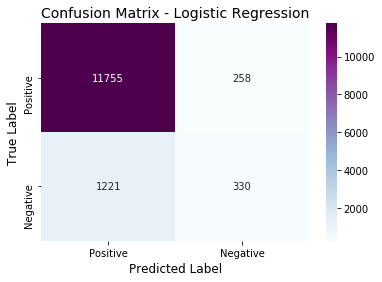

In [26]:
cm1 = confusion_matrix(y_test,lr_pred)
class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Logistic Regression",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, lr_pred))
print("Classification Report: \n",classification_report(y_test, lr_pred))

### KNN

In [27]:
neighbors = np.arange(1,20,2)

In [28]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, knn_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
k_opt = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is: %d" %k_opt)

The optimal number of neighbors is: 17


Text(0, 0.5, 'Misclassification Error')

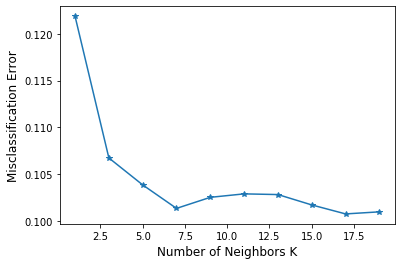

In [29]:
plt.plot(neighbors, MSE, marker="*")
plt.xlabel('Number of Neighbors K',fontsize=12)
plt.ylabel('Misclassification Error',fontsize=12)

In [30]:
knn_model = KNeighborsClassifier(n_neighbors=17, metric = 'euclidean')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [31]:
knn_model.score(X_test,y_test)

0.8992185196107343

Accuracy :  0.898997345915659
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.28      0.38      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.63      0.66     13564
weighted avg       0.88      0.90      0.88     13564



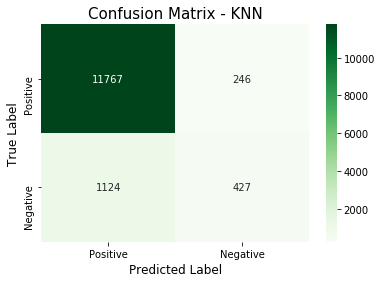

In [32]:
cm2 = confusion_matrix(y_test,knn_pred)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d",cmap="Greens")
plt.title("Confusion Matrix - KNN",fontsize=15)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, knn_pred))
print("Classification Report: \n",classification_report(y_test, knn_pred))

### Decision Tree Classifier

In [33]:
dtree = DecisionTreeClassifier(max_depth=6)

In [34]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [35]:
dtree.score(X_test,y_test)

0.9049690356826895

In [36]:
dtree_pred = dtree.predict(X_test)

Accuracy :  0.9049690356826895
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.64      0.38      0.48      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.68      0.71     13564
weighted avg       0.89      0.90      0.89     13564



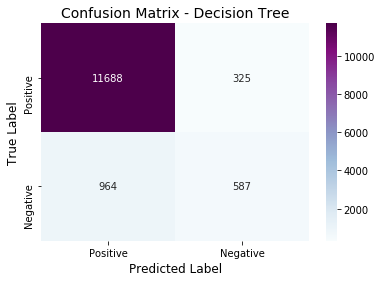

In [37]:
cm3 = confusion_matrix(y_test,dtree_pred)
class_label = ["Positive", "Negative"]
df_cm3 = pd.DataFrame(cm3, index = class_label, columns = class_label)
sns.heatmap(df_cm3, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Decision Tree",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, dtree_pred))
print("Classification Report: \n",classification_report(y_test, dtree_pred))

#### Visualizing the Decision tree

In [38]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

c:\python\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


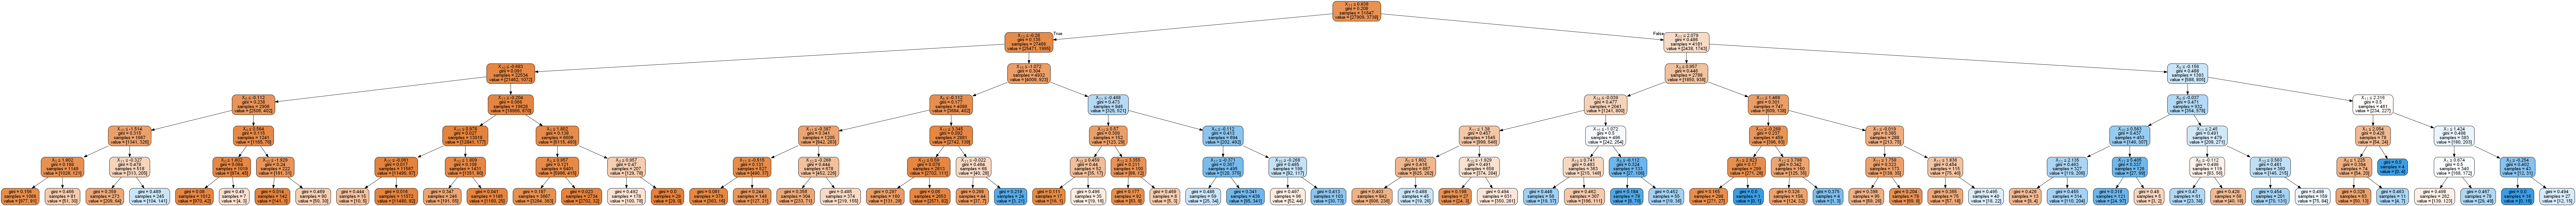

In [39]:
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtree.png')
Image(graph.create_png())

### Random Forest Classifier

In [40]:
rfc = RandomForestClassifier(n_estimators=165,random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=165,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [41]:
rfc.score(X_test,y_test)

0.9085815393689177

Tuning of parameter "n_estimators" to "165" results in maximum score.

In [42]:
rfc_pred = rfc.predict(X_test)

Accuracy :  0.9085815393689177
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.64      0.47      0.54      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.72      0.74     13564
weighted avg       0.90      0.91      0.90     13564



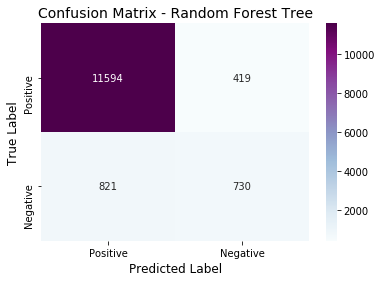

In [43]:
cm4 = confusion_matrix(y_test,rfc_pred)
class_label = ["Positive", "Negative"]
df_cm4 = pd.DataFrame(cm4, index = class_label, columns = class_label)
sns.heatmap(df_cm4, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Random Forest Tree",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, rfc_pred))
print("Classification Report: \n",classification_report(y_test, rfc_pred))

### Bagging Classifier

In [44]:
bag = BaggingClassifier(n_estimators=200, random_state=1)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=200,
                  n_jobs=None, oob_score=False, random_state=1, verbose=0,
                  warm_start=False)

In [45]:
bag.score(X_test,y_test)

0.9076231200235919

Tuning of parameter "n_estimators" to "200" results in maximum score.

In [46]:
bag_pred = bag.predict(X_test)

Accuracy :  0.9076231200235919
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95     12013
           1       0.61      0.52      0.56      1551

    accuracy                           0.91     13564
   macro avg       0.78      0.74      0.76     13564
weighted avg       0.90      0.91      0.90     13564



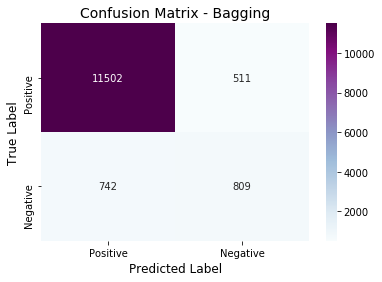

In [47]:
cm5 = confusion_matrix(y_test,bag_pred)
class_label = ["Positive", "Negative"]
df_cm5 = pd.DataFrame(cm5, index = class_label, columns = class_label)
sns.heatmap(df_cm5, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Bagging",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, bag_pred))
print("Classification Report: \n",classification_report(y_test, bag_pred))

### Ada Boost Classifier

In [48]:
ada = AdaBoostClassifier(n_estimators=180,random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=180, random_state=1)

In [49]:
ada.score(X_test,y_test)

0.9003981126511353

Tuning of parameter "n_estimators" to "180" results in maximum score.

In [50]:
ada_pred = ada.predict(X_test)

Accuracy :  0.9003981126511353
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95     12013
           1       0.61      0.36      0.45      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.67      0.70     13564
weighted avg       0.89      0.90      0.89     13564



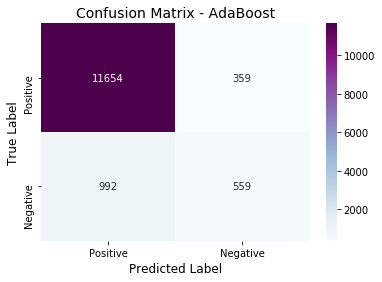

In [51]:
cm6 = confusion_matrix(y_test,ada_pred)
class_label = ["Positive", "Negative"]
df_cm6 = pd.DataFrame(cm6, index = class_label, columns = class_label)
sns.heatmap(df_cm6, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - AdaBoost",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, ada_pred))
print("Classification Report: \n",classification_report(y_test, ada_pred))

### Gradient Boosting Classifier

In [52]:
gboost = GradientBoostingClassifier(max_depth=5,random_state=1)
gboost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
gboost.score(X_test,y_test)

0.9106458271896196

Tuning of parameter "max_depth" to value "5" gives maximum score

In [54]:
gboost_pred = gboost.predict(X_test)

Accuracy :  0.9106458271896196
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     12013
           1       0.65      0.48      0.55      1551

    accuracy                           0.91     13564
   macro avg       0.79      0.72      0.75     13564
weighted avg       0.90      0.91      0.90     13564



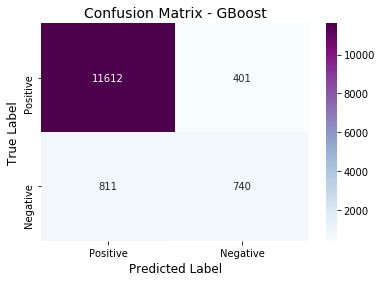

In [55]:
cm7 = confusion_matrix(y_test,gboost_pred)
class_label = ["Positive", "Negative"]
df_cm7 = pd.DataFrame(cm7, index = class_label, columns = class_label)
sns.heatmap(df_cm7, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - GBoost",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, gboost_pred))
print("Classification Report: \n",classification_report(y_test, gboost_pred))

### Model Comparison

#### Receiver Operating Characteristic (ROC) Curve

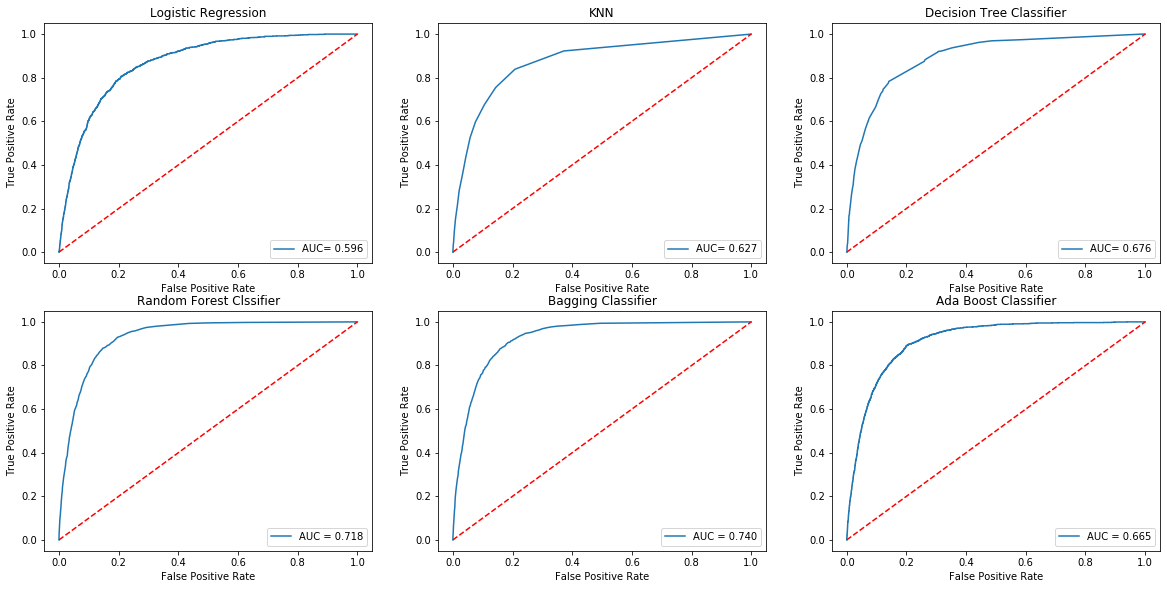

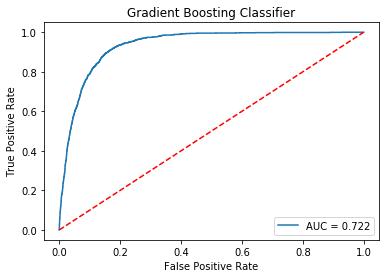

In [56]:
fig = plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
lr_auc = roc_auc_score(y_test,lr_pred)
fpr_dtree,tpr_dtree,threshold_dtree = roc_curve(y_test,lr_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtree,tpr_dtree,label="AUC= %0.3f" % lr_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show

plt.subplot(3,3,2)
knn_auc = roc_auc_score(y_test,knn_pred)
fpr_dtree,tpr_dtree,threshold_dtree = roc_curve(y_test,knn_model.predict_proba(X_test)[:,1])
plt.plot(fpr_dtree,tpr_dtree,label="AUC= %0.3f" % knn_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show


plt.subplot(3,3,3)
dtree_auc = roc_auc_score(y_test,dtree_pred)
fpr_dtree,tpr_dtree,threshold_dtree = roc_curve(y_test,dtree.predict_proba(X_test)[:,1])
plt.plot(fpr_dtree,tpr_dtree,label="AUC= %0.3f" % dtree_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show

plt.subplot(3,3,4)
rfc_auc = roc_auc_score(y_test,rfc_pred)
fpr_rfc,tpr_rfc,threshold_rfc = roc_curve(y_test,rfc.predict_proba(X_test)[:,1])
plt.plot(fpr_rfc,tpr_rfc,label="AUC = %0.3f" % rfc_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Random Forest Clssifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show

plt.subplot(3,3,5)
bag_auc = roc_auc_score(y_test,bag_pred)
fpr_bag,tpr_bag,threshold_bag = roc_curve(y_test,bag.predict_proba(X_test)[:,1])
plt.plot(fpr_bag,tpr_bag,label="AUC = %0.3f" % bag_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Bagging Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show

plt.subplot(3,3,6)
ada_auc = roc_auc_score(y_test,ada_pred)
fpr_ada,tpr_ada,threshold_ada = roc_curve(y_test,ada.predict_proba(X_test)[:,1])
plt.plot(fpr_ada,tpr_ada,label="AUC = %0.3f" % ada_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Ada Boost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

gboost_auc = roc_auc_score(y_test,gboost_pred)
fpr_gboost,tpr_gboost,threshold_gboost = roc_curve(y_test,gboost.predict_proba(X_test)[:,1])
plt.plot(fpr_gboost,tpr_gboost,label="AUC = %0.3f" % gboost_auc)
plt.plot([0,1],[0,1],'r--')
plt.title('Gradient Boosting Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [57]:
Models= pd.DataFrame({'Train_Score':[lr_model.score(X_train,y_train),knn_model.score(X_train,y_train),dtree.score(X_train,y_train),rfc.score(X_train,y_train),bag.score(X_train,y_train),ada.score(X_train,y_train),gboost.score(X_train,y_train)]
                     ,'Test_Score':[lr_model.score(X_test,y_test),knn_model.score(X_test,y_test),dtree.score(X_test,y_test),rfc.score(X_test,y_test),bag.score(X_test,y_test),ada.score(X_test,y_test),gboost.score(X_test,y_test)]
                     ,'Accuracy':[accuracy_score(y_test,lr_pred),accuracy_score(y_test,knn_pred),accuracy_score(y_test,dtree_pred),accuracy_score(y_test,rfc_pred),accuracy_score(y_test,bag_pred),accuracy_score(y_test,ada_pred),accuracy_score(y_test,gboost_pred)]
                     ,'Precision':[precision_score(y_test,lr_pred),precision_score(y_test,knn_pred),precision_score(y_test,dtree_pred),precision_score(y_test,rfc_pred),precision_score(y_test,bag_pred),precision_score(y_test,ada_pred),precision_score(y_test,gboost_pred)]
                     ,'Recall':[recall_score(y_test,lr_pred),recall_score(y_test,knn_pred),recall_score(y_test,dtree_pred),recall_score(y_test,rfc_pred),recall_score(y_test,bag_pred),recall_score(y_test,ada_pred),recall_score(y_test,gboost_pred)]
                     ,'AUC':[lr_auc,knn_auc,dtree_auc,rfc_auc,bag_auc,ada_auc,gboost_auc]}
                     ,index=['Logistic Regression','KNN','Decision Tree','Random Forest','Bagging','Adaboost','GradientBoost'])
Models

,Train_Score,Test_Score,Accuracy,Precision,Recall,AUC
Logistic Regression,0.891333,0.890961,0.890961,0.561224,0.212766,0.595645
KNN,0.905520,0.899219,0.898997,0.634473,0.275306,0.627414
Decision Tree,0.905963,0.904969,0.904969,0.643640,0.378466,0.675706
Random Forest,0.999968,0.908582,0.908582,0.635335,0.470664,0.717893
Bagging,0.999968,0.907623,0.907623,0.612879,0.521599,0.739531
Adaboost,0.901476,0.900398,0.900398,0.608932,0.360413,0.665264
GradientBoost,0.925870,0.910646,0.910646,0.648554,0.477112,0.721866


### Conclusion

From above analysis,it can be seen that <strong>"Gradient Boost Model"</strong> has the highest test score <strong>(91.06%)</strong>, accuracy and AUC. So it can be chosen as the best model for this case study.

<strong>Suggestions for Next Campaign:</strong>

- Target clients in age category younger than 25 and above 60.
- Increase the duaration of phone calls
- Focus the campaign during the months of March, September, October and December